In [1]:
%matplotlib inline

import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

import numpy as np
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_table('integrated.tsv', sep='\t', index_col = 'Probe Set ID')[['NAA_mean', 'IAA_mean','p-value',]]

In [3]:
AuxRE_class = ['AuxRE+', 'AuxRE+_ABRElike+', 'AuxRE+_ABRElike-',
       'AuxRE+_AuxRE-like+', 'AuxRE+_AuxRE-like-', 'AuxRE+_Ypatch+',
       'AuxRE+_Ypatch-', 'AuxRE-', 'AuxRE-_ABRElike-', 'AuxRE-_ABRElike+',
       'AuxRE-_AuxRE-like-', 'AuxRE-_AuxRE-like+', 'AuxRE-_Ypatch-', 'AuxRE-_Ypatch+']
AuxRE = pd.read_table('Composite AuxREs with ArrayID.tsv', sep='\t', index_col = 'Probe Set ID')[AuxRE_class]

In [4]:
df = df.merge(AuxRE, left_index=True, right_index=True)

In [8]:
df = df[df['AuxRE+']+df['AuxRE+_ABRElike+']+df['AuxRE+_ABRElike-']+df['AuxRE+_AuxRE-like+']+df['AuxRE+_AuxRE-like-']+df['AuxRE+_Ypatch+']+df['AuxRE+_Ypatch-']+df['AuxRE-']+df['AuxRE-_ABRElike-']+df['AuxRE-_ABRElike+']+df['AuxRE-_AuxRE-like-']+df['AuxRE-_AuxRE-like+']+df['AuxRE-_Ypatch-']+df['AuxRE-_Ypatch+']>0]
df

,NAA_mean,IAA_mean,p-value,AuxRE+,AuxRE+_ABRElike+,AuxRE+_ABRElike-,AuxRE+_AuxRE-like+,AuxRE+_AuxRE-like-,AuxRE+_Ypatch+,AuxRE+_Ypatch-,AuxRE-,AuxRE-_ABRElike-,AuxRE-_ABRElike+,AuxRE-_AuxRE-like-,AuxRE-_AuxRE-like+,AuxRE-_Ypatch-,AuxRE-_Ypatch+
Probe Set ID,,,,,,,,,,,,,,,,,
245051_at,0.446791,0.059114,0.168926,1,0,0,1,0,1,0,0,0,0,0,0,0,0
245055_at,-0.135374,0.740023,0.094764,1,0,0,0,1,1,0,0,0,0,0,0,0,0
245056_at,0.334752,1.440951,0.029831,0,0,0,0,0,0,0,1,0,0,0,1,0,0
245061_at,-0.584685,0.058034,0.431846,1,1,0,0,0,1,0,0,0,0,0,0,0,0
245068_at,-0.968393,-0.664112,0.602240,1,0,0,0,0,0,0,0,0,0,0,0,0,0
245082_at,0.914712,0.687927,0.640561,0,0,0,0,0,0,0,1,0,0,0,0,0,0
245116_at,0.201114,0.203216,0.992470,0,0,0,0,0,0,0,1,0,1,1,0,0,0
245120_at,0.209283,0.164217,0.921826,1,0,0,0,0,0,0,0,0,0,0,0,0,0
245133_at,-0.397684,-0.111614,0.203681,1,0,0,0,0,1,0,1,0,0,0,1,1,0


In [9]:
km = KMeans(n_clusters=5)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([df.index,labels]).T

In [11]:
results

,0,1
0,245051_at,3
1,245055_at,3
2,245056_at,0
3,245061_at,3
4,245068_at,2
5,245082_at,0
6,245116_at,0
7,245120_at,2
8,245133_at,3
9,245147_at,2


In [12]:
df_with_results = df.merge(results, left_index=True, right_on=0)
df_with_results

,NAA_mean,IAA_mean,p-value,AuxRE+,AuxRE+_ABRElike+,AuxRE+_ABRElike-,AuxRE+_AuxRE-like+,AuxRE+_AuxRE-like-,AuxRE+_Ypatch+,AuxRE+_Ypatch-,AuxRE-,AuxRE-_ABRElike-,AuxRE-_ABRElike+,AuxRE-_AuxRE-like-,AuxRE-_AuxRE-like+,AuxRE-_Ypatch-,AuxRE-_Ypatch+,0,1
0,0.446791,0.059114,0.168926,1,0,0,1,0,1,0,0,0,0,0,0,0,0,245051_at,3
1,-0.135374,0.740023,0.094764,1,0,0,0,1,1,0,0,0,0,0,0,0,0,245055_at,3
2,0.334752,1.440951,0.029831,0,0,0,0,0,0,0,1,0,0,0,1,0,0,245056_at,0
3,-0.584685,0.058034,0.431846,1,1,0,0,0,1,0,0,0,0,0,0,0,0,245061_at,3
4,-0.968393,-0.664112,0.602240,1,0,0,0,0,0,0,0,0,0,0,0,0,0,245068_at,2
5,0.914712,0.687927,0.640561,0,0,0,0,0,0,0,1,0,0,0,0,0,0,245082_at,0
6,0.201114,0.203216,0.992470,0,0,0,0,0,0,0,1,0,1,1,0,0,0,245116_at,0
7,0.209283,0.164217,0.921826,1,0,0,0,0,0,0,0,0,0,0,0,0,0,245120_at,2
8,-0.397684,-0.111614,0.203681,1,0,0,0,0,1,0,1,0,0,0,1,1,0,245133_at,3
9,0.293398,0.405890,0.809980,1,0,0,1,0,0,0,0,0,0,0,0,0,0,245147_at,2


In [13]:
def splited_violinplot(dataf, x, order=None, bw=.2, figsize=(8,7)):
    df_copy = dataf.copy()
    l = len(df_copy)
    df_copy['logFC_mean'] = 0
    df_copy['hue'] = 'Null'
    df_copy = pd.concat([df_copy, df_copy], ignore_index=True)
    for i in range(l):
        df_copy.loc[i, 'logFC_mean'] = df_copy.loc[i, 'IAA_mean']
        df_copy.loc[i, 'hue'] = 'IAA'
        df_copy.loc[i+l, 'logFC_mean'] = df_copy.loc[i, 'NAA_mean']
        df_copy.loc[i+l, 'hue'] = 'NAA'
    plt.figure(figsize=figsize)
    if order is None:
        return sns.violinplot(x=x, y='logFC_mean', hue='hue', data=df_copy, split=True, bw=bw)
    return sns.violinplot(x=x, y='logFC_mean', hue='hue', data=df_copy, split=True, order=order, bw=bw)

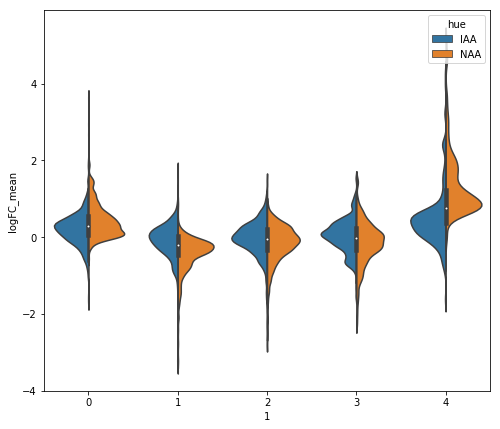

In [14]:
splited_violinplot(df_with_results, x=1)

### 毕竟直接用了 NAA IAA 数据聚的类，还没 normalize, 相当于那两栏数据权重很大，聚成这样正常，要注意看下 AuxRE 里头的差异情况

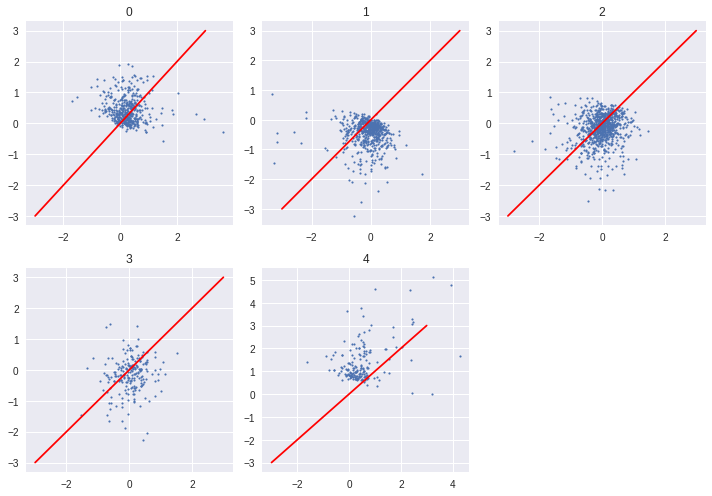

In [16]:
plt.style.use(u'seaborn')
fig = plt.figure(1, figsize=(10,7))
subplots = [plt.subplot(2, 3, 1+i) for i in range(5)]
for i in range(5):
    subplots[i].scatter(x='IAA_mean', y='NAA_mean', data=df_with_results[df_with_results[1]==i], s=3)
    subplots[i].plot([-3,3], [-3,3], 'r')
    subplots[i].set_title(str(i))
fig.tight_layout()

In [17]:
centers = km.cluster_centers_
centers

array([[  4.29861785e-01,   2.32749104e-01,   3.89114005e-01,
          2.50000000e-02,   9.09090909e-03,   9.15933995e-16,
         -5.82867088e-16,  -2.63677968e-16,   2.27272727e-03,
         -1.90819582e-16,   1.04318182e+00,   1.77272727e-01,
          2.47727273e-01,   2.54545455e-01,   1.27272727e-01,
          1.70454545e-01,   4.31818182e-02],
       [ -4.48956437e-01,  -1.14882017e-01,   3.36252387e-01,
          2.55102041e-02,   1.70068027e-03,   6.80272109e-03,
          1.70068027e-03,   1.70068027e-03,   1.70068027e-03,
         -2.39391840e-16,   1.03741497e+00,   2.65306122e-01,
          1.46258503e-01,   2.12585034e-01,   9.52380952e-02,
          2.12585034e-01,   7.14285714e-02],
       [ -1.62693458e-01,  -3.14613662e-02,   3.86342493e-01,
          1.03661616e+00,   1.86868687e-01,   1.70454545e-01,
          1.79292929e-01,   1.30050505e-01,   2.27595720e-15,
          4.54545455e-02,   2.65151515e-02,  -1.87350135e-15,
          1.26262626e-03,   3.78787879e-03

In [18]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [19]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8))
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [20]:
P = pd_centers([ 'NAA_mean', 'IAA_mean', 'p-value', 'AuxRE+', 'AuxRE+_ABRElike+', 'AuxRE+_ABRElike-', 'AuxRE+_AuxRE-like+', 'AuxRE+_AuxRE-like-',     'AuxRE+_Ypatch+',
'AuxRE+_Ypatch-', 'AuxRE-', 'AuxRE-_ABRElike-', 'AuxRE-_ABRElike+', 'AuxRE-_AuxRE-like-', 'AuxRE-_AuxRE-like+',
'AuxRE-_Ypatch-', 'AuxRE-_Ypatch+'], centers)
P

,NAA_mean,IAA_mean,p-value,AuxRE+,AuxRE+_ABRElike+,AuxRE+_ABRElike-,AuxRE+_AuxRE-like+,AuxRE+_AuxRE-like-,AuxRE+_Ypatch+,AuxRE+_Ypatch-,AuxRE-,AuxRE-_ABRElike-,AuxRE-_ABRElike+,AuxRE-_AuxRE-like-,AuxRE-_AuxRE-like+,AuxRE-_Ypatch-,AuxRE-_Ypatch+,prediction
0,0.429862,0.232749,0.389114,0.025000,0.009091,9.159340e-16,-5.828671e-16,-2.636780e-16,2.272727e-03,-1.908196e-16,1.043182,1.772727e-01,2.477273e-01,2.545455e-01,0.127273,0.170455,4.318182e-02,0
1,-0.448956,-0.114882,0.336252,0.025510,0.001701,6.802721e-03,1.700680e-03,1.700680e-03,1.700680e-03,-2.393918e-16,1.037415,2.653061e-01,1.462585e-01,2.125850e-01,0.095238,0.212585,7.142857e-02,1
2,-0.162693,-0.031461,0.386342,1.036616,0.186869,1.704545e-01,1.792929e-01,1.300505e-01,2.275957e-15,4.545455e-02,0.026515,-1.873501e-15,1.262626e-03,3.787879e-03,0.003788,0.001263,-2.393918e-16,2
3,-0.159973,0.029814,0.359623,1.034146,0.307317,1.463415e-01,3.414634e-01,1.024390e-01,1.268293e+00,1.951220e-02,0.039024,2.914335e-16,1.942890e-16,4.163336e-17,0.009756,0.014634,5.551115e-17,3
4,1.376322,0.497437,0.238243,0.964706,0.147059,1.647059e-01,3.352941e-01,1.058824e-01,1.647059e-01,3.529412e-02,0.123529,1.176471e-02,1.176471e-02,1.176471e-02,0.017647,0.011765,5.882353e-03,4


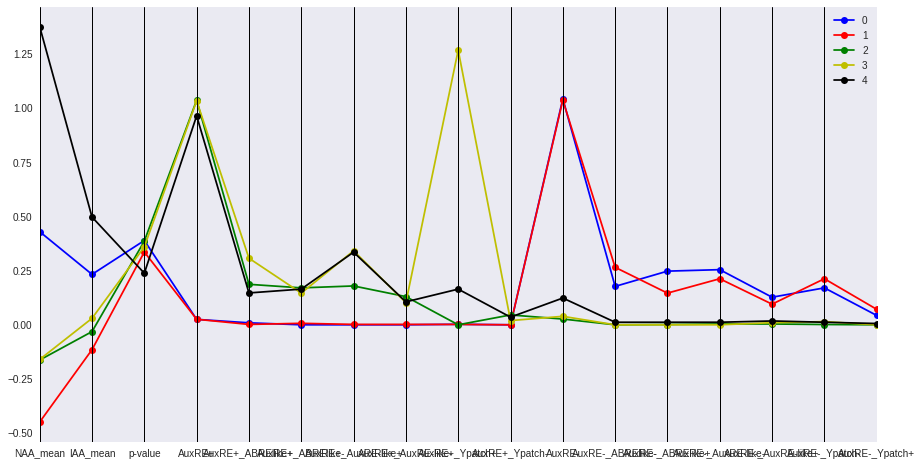

In [21]:
parallel_plot(P)

## Normalized below

In [52]:
from sklearn.preprocessing import StandardScaler

In [55]:
df_with_results.to_csv('KMeans_temp.tsv', sep='\t')

In [ ]:
toNormalize = pd.read_table('KMeans_temp.tsv', index_col='0')[['NAA_mean', 'IAA_mean', 'p-value', 'AuxRE+', 'AuxRE+_ABRElike+', 'AuxRE+_ABRElike-', 'AuxRE+_AuxRE-like+', 'AuxRE+_AuxRE-like-',     'AuxRE+_Ypatch+',
'AuxRE+_Ypatch-', 'AuxRE-', 'AuxRE-_ABRElike-', 'AuxRE-_ABRElike+', 'AuxRE-_AuxRE-like-', 'AuxRE-_AuxRE-like+',
'AuxRE-_Ypatch-', 'AuxRE-_Ypatch+']]

In [59]:
X = StandardScaler().fit_transform(toNormalize)

In [60]:
Normalized_km = KMeans(n_clusters=5)
Normalized_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
toNormalize['nth_cluster'] = Normalized_km.labels_

In [62]:
toNormalize

,NAA_mean,IAA_mean,p-value,AuxRE+,AuxRE+_ABRElike+,AuxRE+_ABRElike-,AuxRE+_AuxRE-like+,AuxRE+_AuxRE-like-,AuxRE+_Ypatch+,AuxRE+_Ypatch-,AuxRE-,AuxRE-_ABRElike-,AuxRE-_ABRElike+,AuxRE-_AuxRE-like-,AuxRE-_AuxRE-like+,AuxRE-_Ypatch-,AuxRE-_Ypatch+,nth_cluster
0,,,,,,,,,,,,,,,,,,
245027_at,-0.388433,-0.154986,0.126655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
245028_at,-0.328116,-1.133845,0.146018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
245029_at,0.025440,-0.303212,0.633507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
245030_at,1.896481,-0.666533,0.016642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
245031_at,-0.130434,-0.625165,0.140232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
245033_at,1.888731,-0.208385,0.009305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
245034_at,-0.093345,-0.848971,0.139361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
245035_at,-0.294725,-0.211660,0.829857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
245036_at,-0.632885,-1.428692,0.202742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


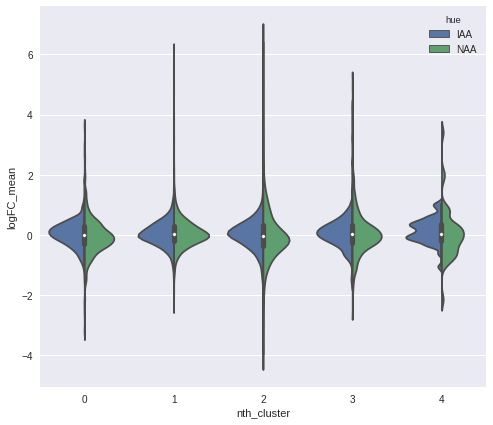

In [63]:
splited_violinplot(toNormalize, x='nth_cluster')

### 毕竟直接用了 NAA IAA 数据聚的类，还没 normalize, 相当于那两栏数据权重很大，聚成这样正常，要注意看下 AuxRE 里头的差异情况

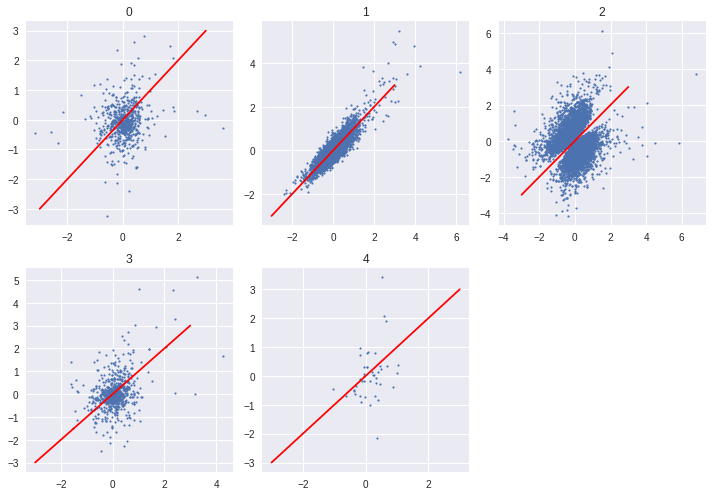

In [66]:
plt.style.use(u'seaborn')
fig = plt.figure(2, figsize=(10,7))
subplots = [plt.subplot(2, 3, 1+i) for i in range(5)]
for i in range(5):
    subplots[i].scatter(x='IAA_mean', y='NAA_mean', data=toNormalize[toNormalize['nth_cluster']==i], s=3)
    subplots[i].plot([-3,3], [-3,3], 'r')
    subplots[i].set_title(str(i))
fig.tight_layout()

In [67]:
centers = Normalized_km.cluster_centers_
centers

array([[ -7.20927463e-02,   1.72946031e-02,  -9.25831612e-02,
         -1.00439241e-01,  -4.34996635e-02,  -2.92676203e-02,
         -8.86850083e-02,  -5.84746464e-02,  -4.30126095e-02,
         -4.49392785e-02,   4.23916483e+00,   2.91365077e+00,
          2.85486739e+00,   2.98151710e+00,   2.22259202e+00,
          2.65128080e+00,   1.68374680e+00],
       [  1.07455834e-01,   4.06155291e-02,   1.08234426e+00,
         -1.45628285e-01,  -9.53939087e-02,  -8.74971486e-02,
         -1.00938141e-01,  -7.58625387e-02,  -9.89029806e-02,
         -4.49392785e-02,  -1.42537450e-01,  -9.20960340e-02,
         -9.03140703e-02,  -9.50446092e-02,  -7.05521140e-02,
         -8.42806591e-02,  -5.29880468e-02],
       [ -7.30402155e-02,  -3.34236124e-02,  -7.10237193e-01,
         -1.41830604e-01,  -9.53939087e-02,  -8.74971486e-02,
         -1.00938141e-01,  -7.58625387e-02,  -9.89029806e-02,
         -4.49392785e-02,  -1.32815735e-01,  -9.20960340e-02,
         -9.03140703e-02,  -9.50446092e-02

In [68]:
P = pd_centers([ 'NAA_mean', 'IAA_mean', 'p-value', 'AuxRE+', 'AuxRE+_ABRElike+', 'AuxRE+_ABRElike-', 'AuxRE+_AuxRE-like+', 'AuxRE+_AuxRE-like-',     'AuxRE+_Ypatch+',
'AuxRE+_Ypatch-', 'AuxRE-', 'AuxRE-_ABRElike-', 'AuxRE-_ABRElike+', 'AuxRE-_AuxRE-like-', 'AuxRE-_AuxRE-like+',
'AuxRE-_Ypatch-', 'AuxRE-_Ypatch+'], centers)
P

,NAA_mean,IAA_mean,p-value,AuxRE+,AuxRE+_ABRElike+,AuxRE+_ABRElike-,AuxRE+_AuxRE-like+,AuxRE+_AuxRE-like-,AuxRE+_Ypatch+,AuxRE+_Ypatch-,AuxRE-,AuxRE-_ABRElike-,AuxRE-_ABRElike+,AuxRE-_AuxRE-like-,AuxRE-_AuxRE-like+,AuxRE-_Ypatch-,AuxRE-_Ypatch+,prediction
0,-0.072093,0.017295,-0.092583,-0.100439,-0.043500,-0.029268,-0.088685,-0.058475,-0.043013,-0.044939,4.239165,2.913651,2.854867,2.981517,2.222592,2.651281,1.683747,0
1,0.107456,0.040616,1.082344,-0.145628,-0.095394,-0.087497,-0.100938,-0.075863,-0.098903,-0.044939,-0.142537,-0.092096,-0.090314,-0.095045,-0.070552,-0.084281,-0.052988,1
2,-0.073040,-0.033424,-0.710237,-0.141831,-0.095394,-0.087497,-0.100938,-0.075863,-0.098903,-0.044939,-0.132816,-0.092096,-0.090314,-0.095045,-0.070552,-0.084281,-0.052988,2
3,0.090996,0.083543,-0.059177,4.034559,2.717889,2.301002,2.979370,2.076336,2.893478,-0.044939,-0.043051,-0.079824,-0.075969,-0.057991,-0.052062,-0.071414,-0.052988,3
4,0.101052,0.201107,-0.208284,4.171251,1.948998,4.500448,1.127795,3.162329,0.861891,21.055620,-0.037423,-0.092096,-0.090314,-0.095045,-0.070552,0.107820,-0.052988,4


/home/yijia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


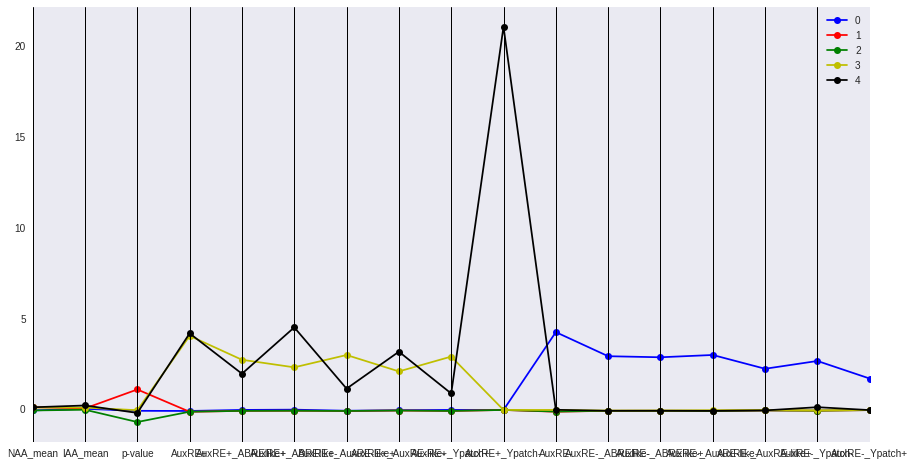

In [71]:
parallel_plot(P)